In [3]:
!pip install tweepy pandas nltk textblob



   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 2.9 MB/s eta 0:00:00


In [7]:
import tweepy
import pandas as pd
from textblob import TextBlob
import re

In [9]:
# --- CONFIG --- #
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAD9K1AEAAAAALnVAaQD2ZEID6ExN73IM6IBV3jY%3DAQ7qhaowdJdPWLaiq5166W1nzvyvg3mENjWn8XBzs50ZhGoNna'  # 🔒 Replace with your actual token
client = tweepy.Client(bearer_token=BEARER_TOKEN)
query = "Zomato -is:retweet lang:en"

In [11]:
# --- UTILITY FUNCTIONS --- #
def clean_text(text):
    text = re.sub(r"http\S+|@\S+|#\S+|[^A-Za-z0-9 ]+", '', text)
    return text.lower()

In [15]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    return 'Positive' if polarity > 0 else 'Negative' if polarity < 0 else 'Neutral'


In [19]:
# --- MAIN FUNCTION --- #
def fetch_tweets():
    try:
        tweets = client.search_recent_tweets(query=query, max_results=20)

        results = []
        for tweet in tweets.data:
            original = tweet.text
            cleaned = clean_text(original)
            sentiment = get_sentiment(cleaned)
            results.append([original, cleaned, sentiment])

        df = pd.DataFrame(results, columns=['Original', 'Cleaned', 'Sentiment'])
        df.to_csv('zomato_sentiments.csv', index=False)
        print("✅ Done! Data saved to zomato_sentiments.csv")

    except tweepy.TooManyRequests:
        print("⏳ Rate limit hit! Waiting for 15 minutes...")
        time.sleep(15 * 60)
        fetch_tweets()  # Retry after cooldown

    except Exception as e:
        print("❌ An error occurred:", e)

# --- RUN SCRIPT --- #
if __name__ == "__main__":
    fetch_tweets()

✅ Done! Data saved to zomato_sentiments.csv


In [27]:
import pandas as pd

df = pd.read_csv('zomato_sentiments.csv')
print(df.head())  # View first 5 rows


                                            Original  \
0  When is @Swiggy and @zomato going to care that...   
1  @zomatocare Why don't you just mention it here...   
2  @ishanjoshii @RCBTweets Ye Zomato Wale kya kar...   
3  @sushilkedia @Swiggy @zomato Reliance Jiomart ...   
4  @verynecessiri @zomato @zomatocare Zomato cust...   

                                             Cleaned Sentiment  
0  when is  and  going to care that its not alway...  Negative  
1   why dont you just mention it here or is there...   Neutral  
2                 ye zomato wale kya kar rhe the wha   Neutral  
3     reliance jiomart is the same as well see th...   Neutral  
4                zomato customer service is pathetic  Negative  


In [29]:
pip install nltk


In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import re
import pandas as pd

nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...


True

In [33]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')  # (already done)

# Initialize the analyzer
sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [35]:
df['VADER_Sentiment'] = df['Cleaned'].apply(get_vader_sentiment)


In [37]:
comparison = df.groupby(['Sentiment', 'VADER_Sentiment']).size().unstack()
print(comparison)


VADER_Sentiment  Negative  Neutral  Positive
Sentiment                                   
Negative              4.0      NaN       3.0
Neutral               3.0      2.0       1.0
Positive              3.0      1.0       3.0


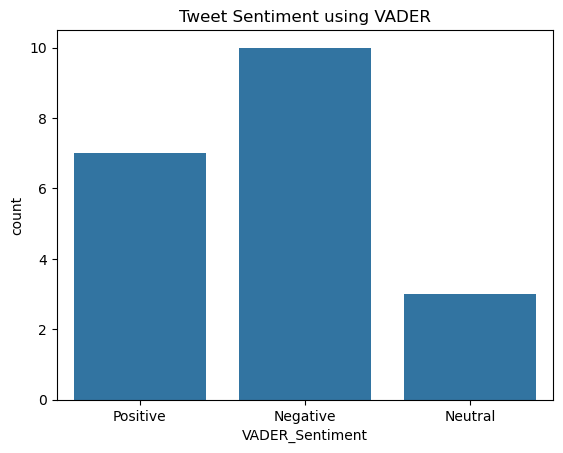

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='VADER_Sentiment', data=df)
plt.title('Tweet Sentiment using VADER')
plt.show()


In [41]:
df.to_csv('zomato_sentiments_vader.csv', index=False)
print("✅ File saved as zomato_sentiments_vader.csv")


✅ File saved as zomato_sentiments_vader.csv


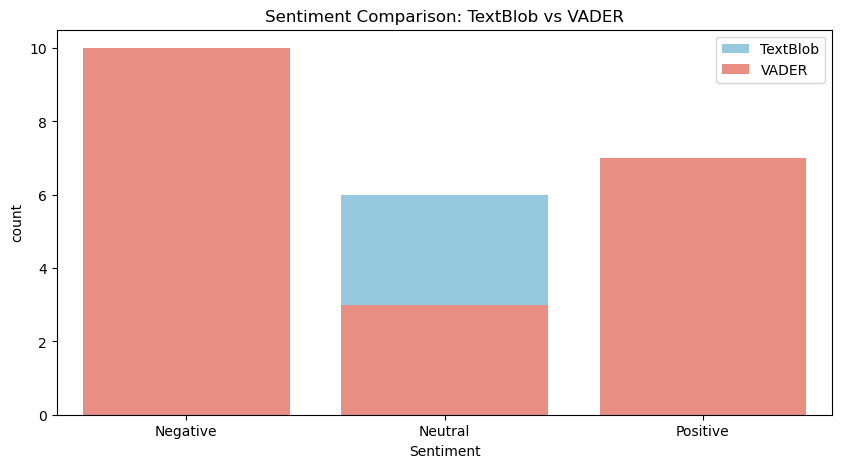

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Sentiment', label='TextBlob', color='skyblue')
sns.countplot(data=df, x='VADER_Sentiment', label='VADER', color='salmon')
plt.title('Sentiment Comparison: TextBlob vs VADER')
plt.legend()
plt.show()


In [47]:
print(df)

                                             Original  \
0   When is @Swiggy and @zomato going to care that...   
1   @zomatocare Why don't you just mention it here...   
2   @ishanjoshii @RCBTweets Ye Zomato Wale kya kar...   
3   @sushilkedia @Swiggy @zomato Reliance Jiomart ...   
4   @verynecessiri @zomato @zomatocare Zomato cust...   
5   @zomatocare hello team,\nPeople are doing big ...   
6   At which point will Indian customers realize t...   
7   @zomatocare Wow 12 hours still no reply amazin...   
8   📱✈️ Must-Have Apps Before You Travel to India!...   
9   bro @zomato @zomatocare how messed up does you...   
10  🔥 Paneer Tikka – A Tandoori Delight! 🔥\nJuicy ...   
11  @zomato I am not sure how you are calculating ...   
12  Zomato's growth slows down! \nNet order value ...   
13  Everyone wants to build the next @zomato. No o...   
14  @zomato No response from zomato support since ...   
15  @zomatocare The experience so far has been pat...   
16  Disappointed with @zomatoca

In [51]:
!pip install emoji


   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 590.6/590.6 kB 7.0 MB/s eta 0:00:00


In [57]:
import pandas as pd
import emoji


df['Tweet_Length'] = df['Original'].apply(len)
df['Word_Count'] = df['Original'].apply(lambda x: len(x.split()))
df['Emoji_Count'] = df['Original'].apply(lambda x: len([c for c in x if c in emoji.EMOJI_DATA]))
print(df)

                                             Original  \
0   When is @Swiggy and @zomato going to care that...   
1   @zomatocare Why don't you just mention it here...   
2   @ishanjoshii @RCBTweets Ye Zomato Wale kya kar...   
3   @sushilkedia @Swiggy @zomato Reliance Jiomart ...   
4   @verynecessiri @zomato @zomatocare Zomato cust...   
5   @zomatocare hello team,\nPeople are doing big ...   
6   At which point will Indian customers realize t...   
7   @zomatocare Wow 12 hours still no reply amazin...   
8   📱✈️ Must-Have Apps Before You Travel to India!...   
9   bro @zomato @zomatocare how messed up does you...   
10  🔥 Paneer Tikka – A Tandoori Delight! 🔥\nJuicy ...   
11  @zomato I am not sure how you are calculating ...   
12  Zomato's growth slows down! \nNet order value ...   
13  Everyone wants to build the next @zomato. No o...   
14  @zomato No response from zomato support since ...   
15  @zomatocare The experience so far has been pat...   
16  Disappointed with @zomatoca

In [65]:
df.to_csv('zomato_twitter_data.csv', index=False)
print("✅ File saved as zomato_twitter_data.csv")

✅ File saved as zomato_twitter_data.csv
